## Fully connected layers + reduced transform using all 2 tasks - Cross Validation Results Evaluation

This is the model simplified (using only one auxilliary task)

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../venv/lib/python3.6/site-packages/")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
base_name = "fully_con_reduced_transform_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
# base_name = "fully_con_reduced_transform_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
folds = []

for filename in os.listdir(pred_dir):
    if filename.startswith(base_name):
        print("loading ", filename)
        folds.append(pd.read_csv(os.path.join(pred_dir, filename)))
        
print ("loaded ", len(folds), " folds")

loading  fully_con_reduced_transform_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-2.csv
loading  fully_con_reduced_transform_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-0.csv
loading  fully_con_reduced_transform_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-1.csv
loading  fully_con_reduced_transform_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-4.csv
loading  fully_con_reduced_transform_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-3.csv
loaded  5  folds


In [4]:
folds[0]

,imageHASH,name,violence,protest,pred_protest,pred_violence
0,b6b9984011c0c0d0,train-17156.jpg,0.455492,True,8.409046e-02,0.475518
1,d5d6123331cef860,train-17918.jpg,-1.000000,False,1.758670e-05,0.259429
2,8222252b1f4b47c7,train-01370.jpg,-1.000000,False,1.157713e-02,0.377744
3,e5e5ccf8f4e4e4f8,train-21326.jpg,0.314813,True,9.994773e-01,0.307407
4,32e4ec6ce4b4cbe4,train-07484.jpg,-1.000000,False,3.394098e-07,0.344973
5,495933777571e1d8,train-23678.jpg,-1.000000,False,7.697599e-06,0.211471
6,bc6e64e4e5e56f46,test-01077.jpg,0.171874,True,2.112111e-01,0.208170
7,f9edade7c6c6ce2f,train-04978.jpg,-1.000000,False,9.994069e-01,0.203915
8,405233a2960a5376,train-20743.jpg,0.327007,True,9.999893e-01,0.296295
9,d10733372f2727f8,train-28094.jpg,-1.000000,False,8.384404e-15,0.313336


### Protest

printing fold  0


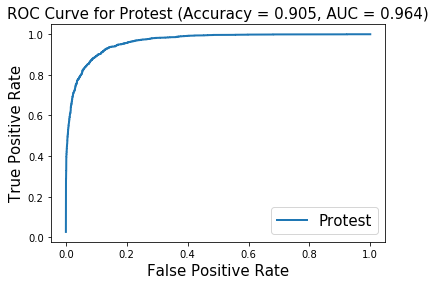

printing fold  1


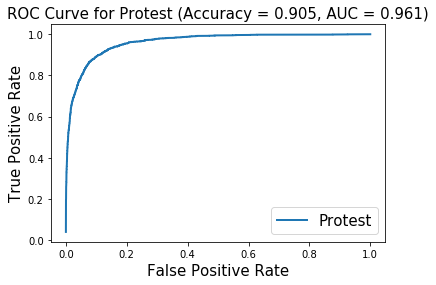

printing fold  2


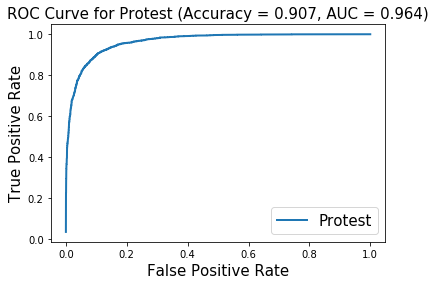

printing fold  3


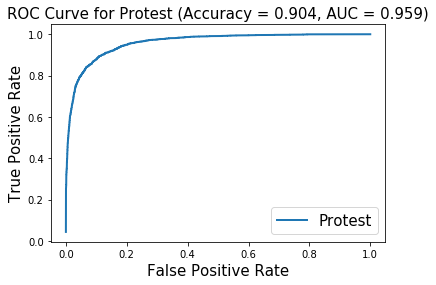

printing fold  4


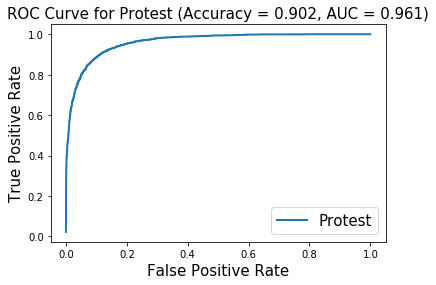

In [5]:
for indx, fold in enumerate(folds):
    print("printing fold " , indx)
    au.plotROC("protest", fold["protest"], fold["pred_protest"])

### Violence

# r_squared_all_folds = []
corr_all_folds = []

for indx, fold in enumerate(folds):
    # remove masked values from test set
    non_masked_violence_true = fold[fold["violence"] != - 1]["violence"]
    non_masked_violence_preds = fold[fold["violence"] != - 1]["pred_violence"]
    
    fig, ax = plt.subplots()
    plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
    plt.xlim([-.05,1.05])
    plt.ylim([-.05,1.05])
    plt.xlabel('Annotation', fontsize = 15)
    plt.ylabel('Predicton', fontsize = 15)
    corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
    r_squared = r_value ** 2
    r_squared_all_folds.append(r_squared)
    corr_all_folds.append(corr)
    plt.title(('{attr} in fold index {fold} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
                .format(attr = "violence", corr= corr, r_2 = r_squared, fold = indx  )), fontsize = 15)
    
std_rsquare = np.std(np.array(r_squared_all_folds))
mean_rsquare = np.mean(np.array(r_squared_all_folds))

std_corr = np.std(np.array(corr_all_folds))
mean_corr = np.mean(np.array(corr_all_folds))

print("the rsquare measure has a mean of ", mean_rsquare, " and standard deviation of ", std_rsquare)
print("the correlation measure has a mean of ", mean_corr, " and standard deviation of ", std_corr)